<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-1/blob/main/ML_HousingDataset_analysis%26modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load housing dataset

In [205]:
# url = 'https://www.kaggle.com/datasets/ashydv/housing-dataset'
housing = pd.read_csv('/content/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [206]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [207]:
housing.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [208]:
housing['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [209]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# DATA ENCODING

Identify Columns for Encoding:

Numerical Columns: 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'.

Categorical Columns: 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'.

Encoding Strategy:

For binary categorical variables ('mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'): Use Label Encoding (0 and 1).

For multi-class categorical variables ('furnishingstatus'): Use One-Hot Encoding.

Numerical columns can generally remain unchanged unless normalization or scaling is required.

In [210]:
#housing.head()

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [212]:
# Encoding binary categorical variables
'''
housing_binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[housing_binary_cols] = housing[housing_binary_cols].replace({'yes': 1, 'no': 0})
'''

"\nhousing_binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']\nhousing[housing_binary_cols] = housing[housing_binary_cols].replace({'yes': 1, 'no': 0})\n"

In [213]:
# Ensure correct column names
print("Columns in the dataset:", housing.columns)

# Update the categorical columns list based on your dataset
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']  # Adjust as needed

# Apply one-hot encoding
housing_encoded = pd.get_dummies(housing, columns=categorical_cols, drop_first=False)

# Display the transformed dataset
print(housing_encoded.head())


Columns in the dataset: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
      price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2        False   
1  12250000  8960         4          4        4        3        False   
2  12250000  9960         3          2        2        2        False   
3  12215000  7500         4          2        2        3        False   
4  11410000  7420         4          1        2        2        False   

   mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0          True          True          False  ...         False   
1          True          True          False  ...         False   
2          True          True          False  ...          True   
3          True          True          False  ...     

In [214]:
housing_encoded.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [215]:
column_to_drop = ['mainroad_no','guestroom_no', 'basement_no', 'hotwaterheating_no',
        'airconditioning_no', 'prefarea_no',]
housing_encoded = housing_encoded.drop(column_to_drop, axis=1)
housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,True,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,True,False,False


In [216]:
# List of columns with boolean data
boolean_columns = [
    'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
    'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_furnished',
    'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'
]

# Convert boolean values to integers (1 for True, 0 for False)
housing_encoded[boolean_columns] = housing_encoded[boolean_columns].astype(int)

# Display the transformed dataset
housing_encoded


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [217]:
housing = housing_encoded
housing.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0


# DATA ANALYSIS

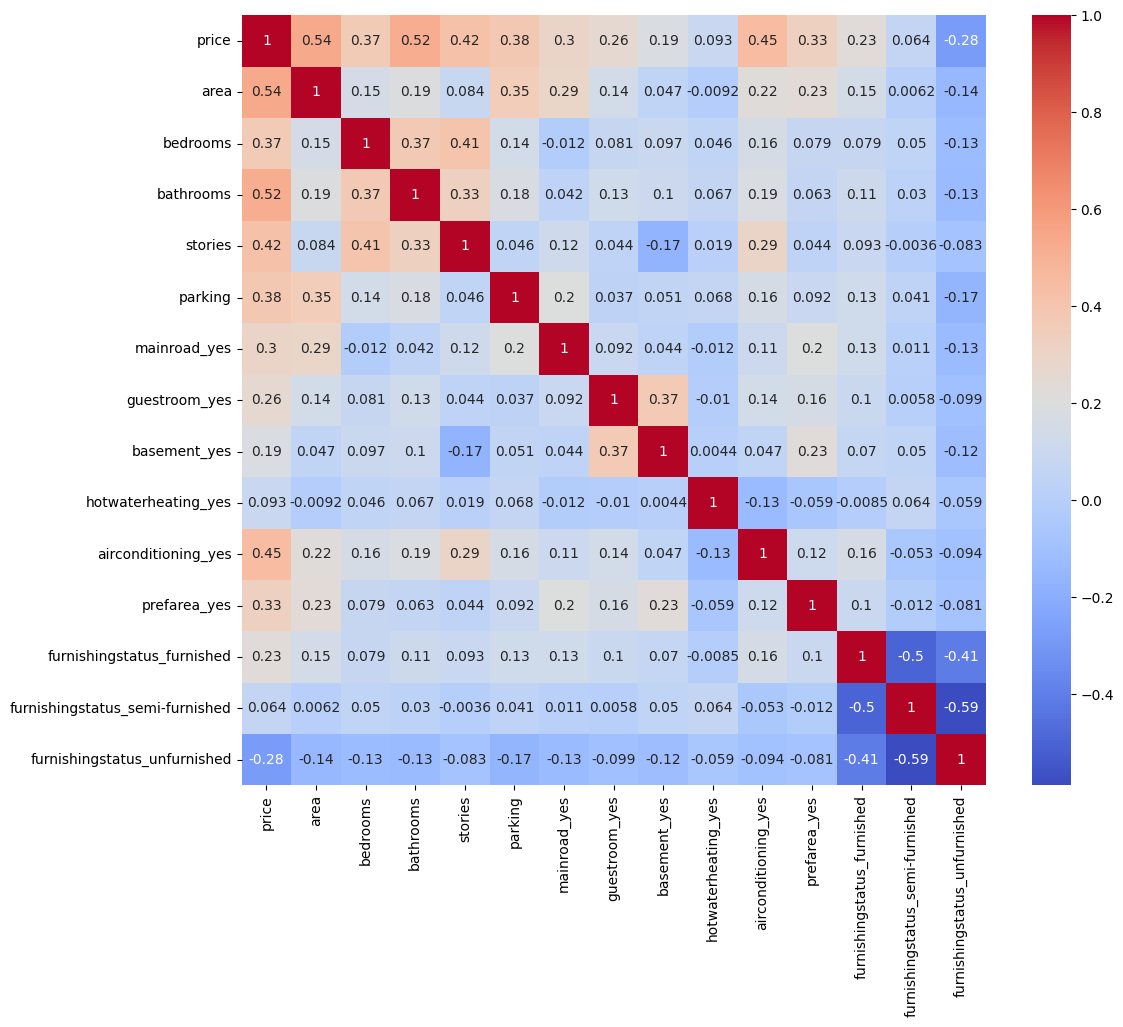

In [218]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(housing.corr(), cmap='coolwarm', annot=True)
plt.show()

# MODELING

In [219]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [220]:
# Selecting features (X) and target (y)
X = housing.drop(['price'], axis=1)
y = housing['price']


In [221]:
# Normalizing/Scaling numerical features
scaler = MinMaxScaler()
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [222]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# Model training

# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [224]:
# Predictions

#y_pred = model.predict(X_test)

y_pred = regr.predict(X_test)
y_pred[:10]

array([5169152., 7217152., 3121152., 4636672., 3260416., 3522560.,
       5595136., 6348800., 2719744., 2613248.])

In [225]:
#The coefficients

print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 3.42128598e+06  3.98951197e+05  3.27667672e+06  1.22868848e+06
  6.81032545e+05  3.56476863e+05  2.32126669e+05  3.94803620e+05
  6.74513397e+05  8.00904182e+05  6.38441415e+05 -4.43906518e+19
 -4.43906518e+19 -4.43906518e+19]


In [226]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 1745777549672.6606


In [227]:
#The intercept
print('Intercept', regr.intercept_)

Intercept 4.4390651831963116e+19


In [228]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.6546140493487141


In [229]:
# Example predictions
print("Sample Predictions:\n", y_pred[:10])

Sample Predictions:
 [5169152. 7217152. 3121152. 4636672. 3260416. 3522560. 5595136. 6348800.
 2719744. 2613248.]


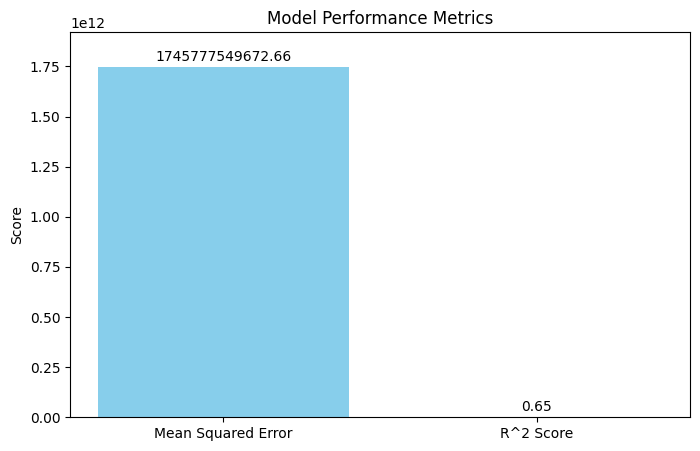

In [230]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Data for plotting
metrics = ['Mean Squared Error', 'R^2 Score']
scores = [mse, r2]

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'salmon'])
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim([0, max(scores) + 0.1 * max(scores)])  # Adjust y-axis for better visualization

# Annotate the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.01 * max(scores), f'{score:.2f}', ha='center', va='bottom')

plt.show()


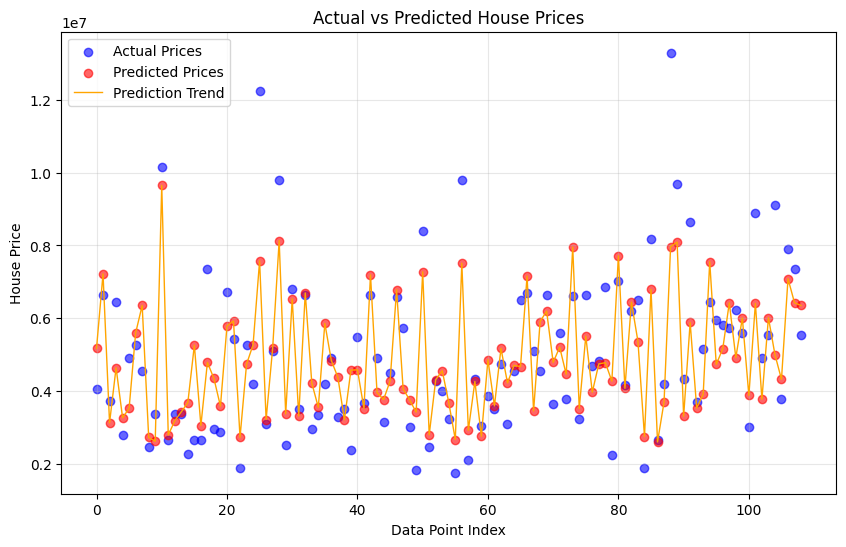

In [231]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices', alpha=0.6)

# Line connecting predictions for better visualization
plt.plot(range(len(y_pred)), y_pred, color='orange', label='Prediction Trend', linewidth=1)

# Adding labels, legend, and title
plt.xlabel('Data Point Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [232]:
housing.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0


In [233]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [242]:
# Example input
sample_data = {
    'area': 7500,
    'bedrooms': 7,
    'bathrooms': 8,  # Assume typical values for other features
    'stories': 2,
    'parking': 4,
    'mainroad_yes': 1,
    'guestroom_yes': 1,
    'basement_yes': 1,
    'hotwaterheating_yes': 1,
    'airconditioning_yes': 1,
    'prefarea_yes': 1,
    'furnishingstatus_furnished': 1,
    'furnishingstatus_semi-furnished': 0,
    'furnishingstatus_unfurnished': 0
}

# Convert input to DataFrame
sample_df = pd.DataFrame([sample_data])

# Scale numerical columns
sample_df[numerical_cols] = scaler.transform(sample_df[numerical_cols])

# Predict
#predicted_price = model.predict(sample_df)[0]
predicted_price = regr.predict(sample_df)[0]
print(f"Predicted House Price: ${predicted_price:,.2f}")


Predicted House Price: $16,121,856.00
